In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
toyota_corolla = pd.read_csv ('C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 5 - Multi Linear Regression/Toyota_Corolla.csv')

In [3]:
toyota_corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Lets remove the unnecessary col and keep the one required for the regression calculation

In [4]:
# required col are "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [5]:
toyota_corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
TC = toyota_corolla.drop(['Id', 'Model', 'Mfg_Month', 'Mfg_Year',
       'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
       'Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'], axis=1)

In [7]:
TC.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
# renaming the Age_08_04 for simplicity of usuage
tc = TC.rename(columns = {'Age_08_04':'Age', 'Quarterly_Tax':'QTax'})

In [9]:
tc.head(5)

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# checking for non null values and data type

In [10]:
tc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QTax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
tc.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [12]:
# checking for duplicates
tc[tc.duplicated()].shape

(1, 9)

In [13]:
tc[tc.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
# dropping the row 113 as its a duplicate row
tc1 =tc.drop([113],axis=0)

In [15]:
tc1 = tc1.reset_index()

In [16]:
tc1 = tc1.drop(['index'],axis =1)

In [17]:
# calculating the correlation
tc1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


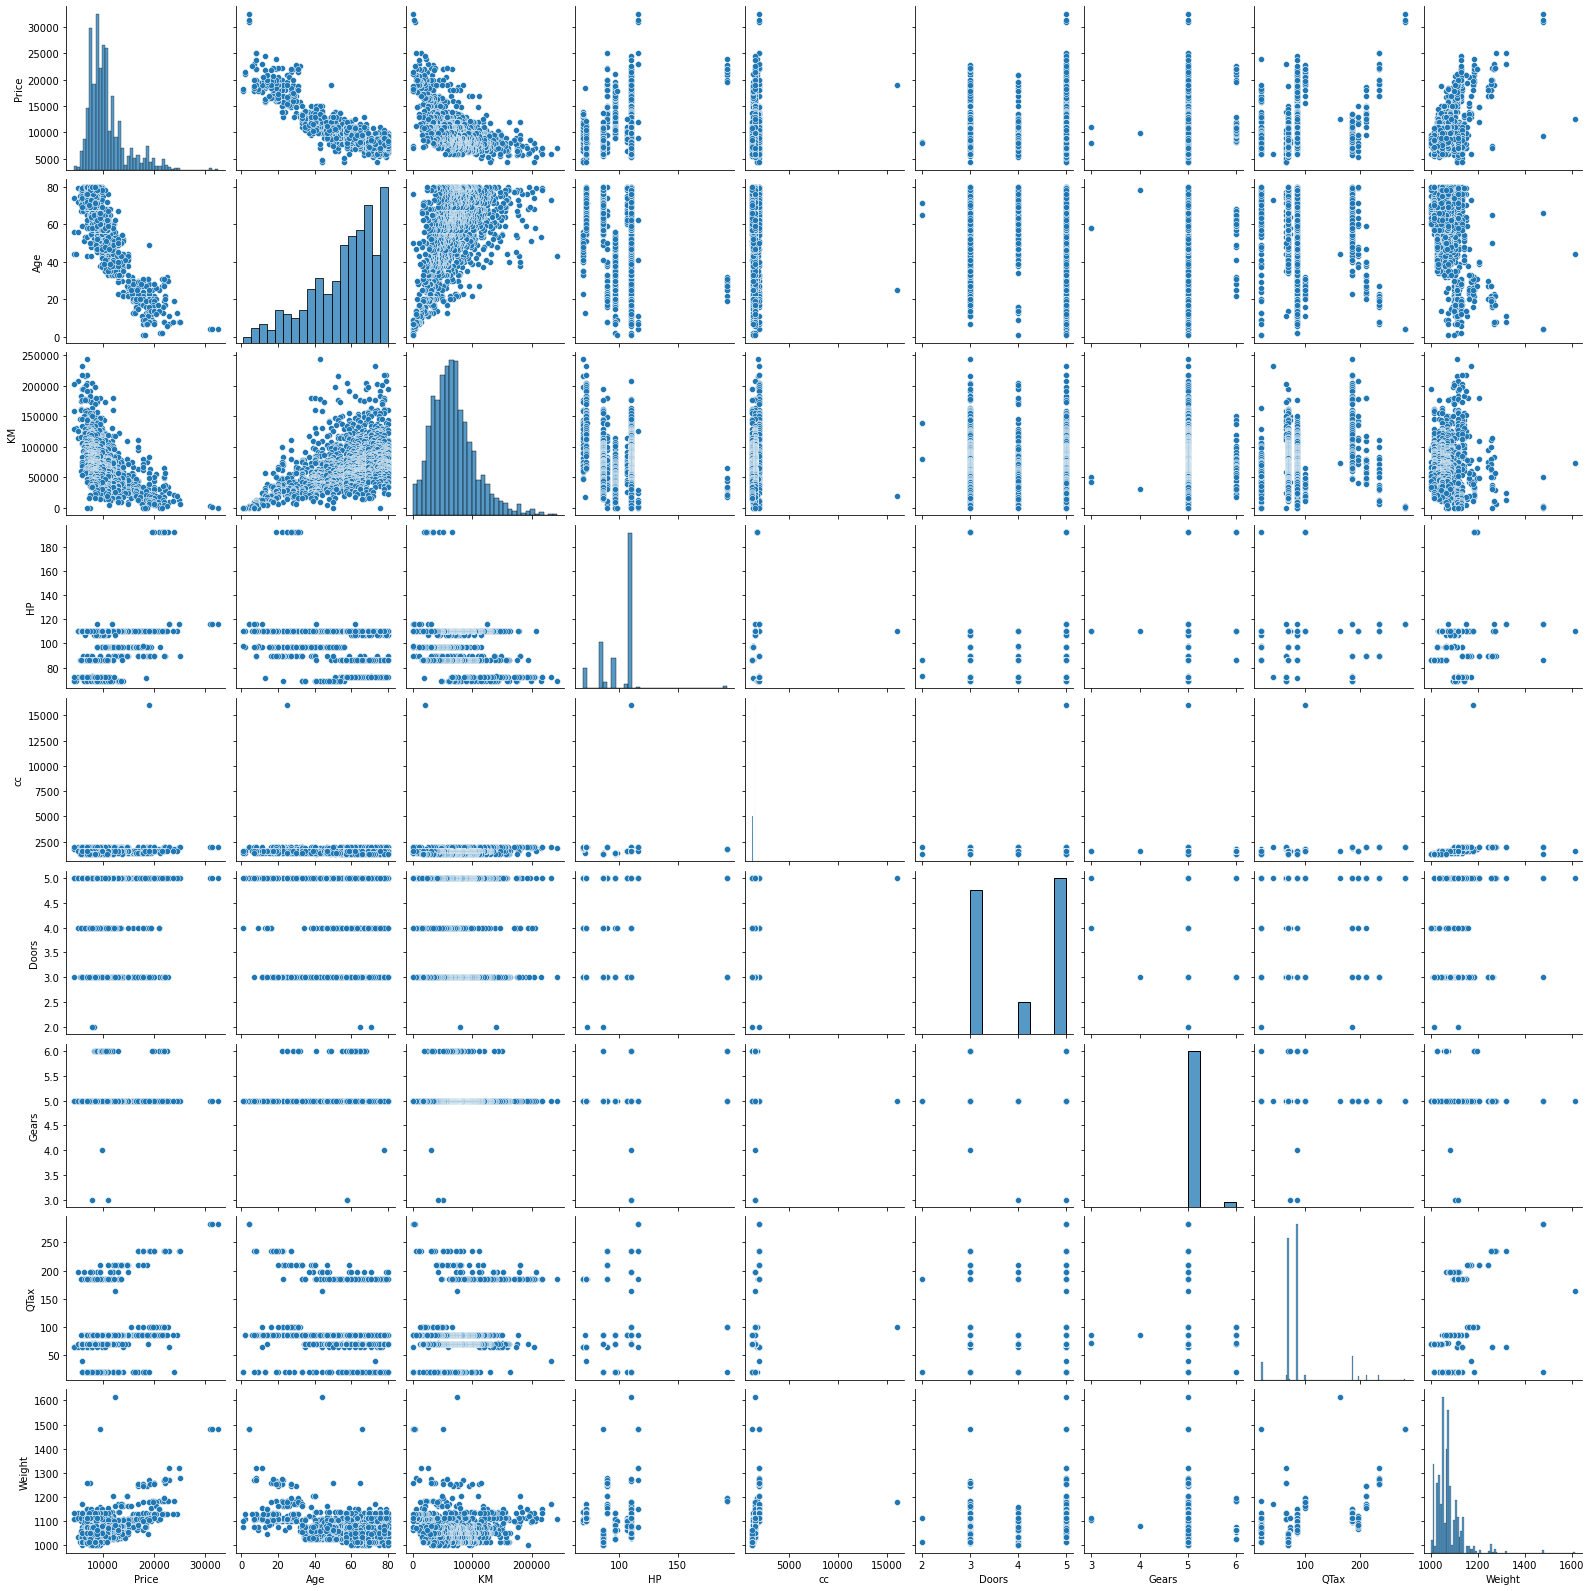

In [18]:
sns.pairplot (data=tc1)

# building the regression model

In [19]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit()

In [20]:
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Weight         16.855470
dtype: float64

In [21]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QTax          2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QTax          3.290363e-03
Weight        1.031118e-51
dtype: float64


In [22]:
(model1.rsquared,model1.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

# Calculating VIF to check colinearity factor

In [23]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+QTax+Weight',data=tc1).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_QTax = smf.ols('QTax~Age+KM+HP+cc+Doors+Gears+Weight',data=tc1).fit().rsquared  
vif_QTax = 1/(1-rsq_QTax) 

rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QTax',data=tc1).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 


d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QTax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QTax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTax,2.295375
7,Weight,2.487180


In [24]:
# All VIF values are less than 20, there are no colinear variables

In [25]:
# Q-Q plot for checking the normality of residuals

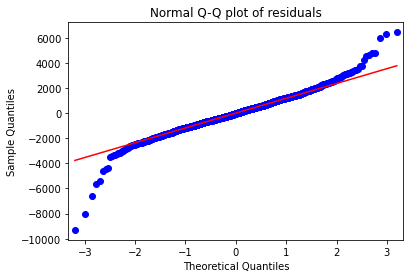

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model1.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [28]:
# QQ plot shows couple of outliers on both the sides, which we will confirm later using cook's distance technique

In [29]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

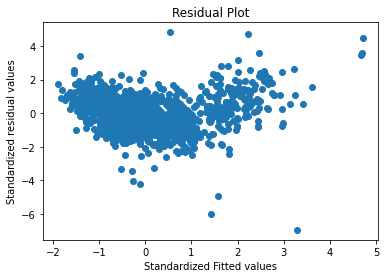

In [30]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

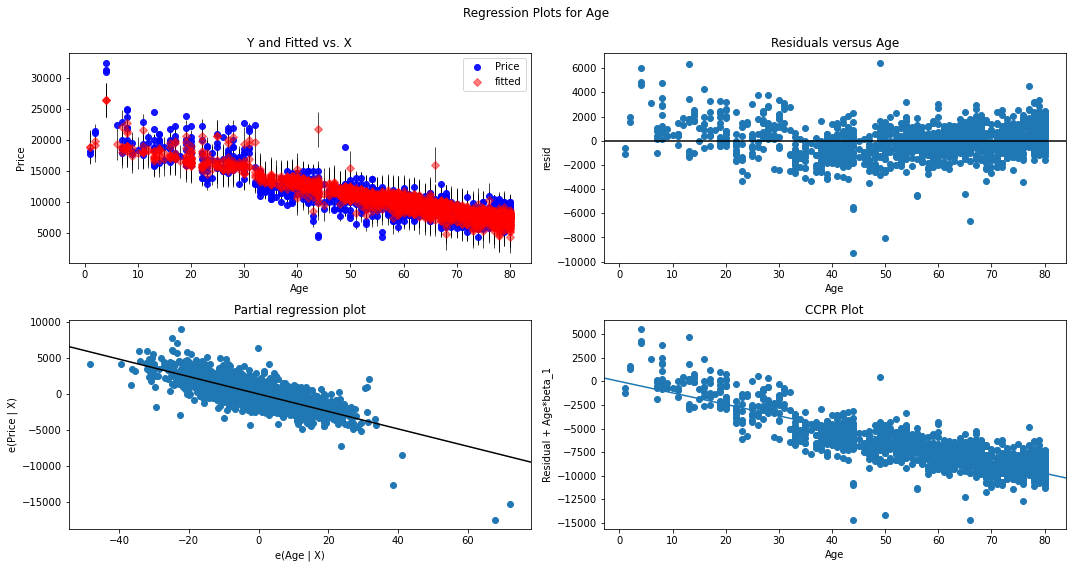

In [31]:
# Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age", fig=fig)
plt.show()

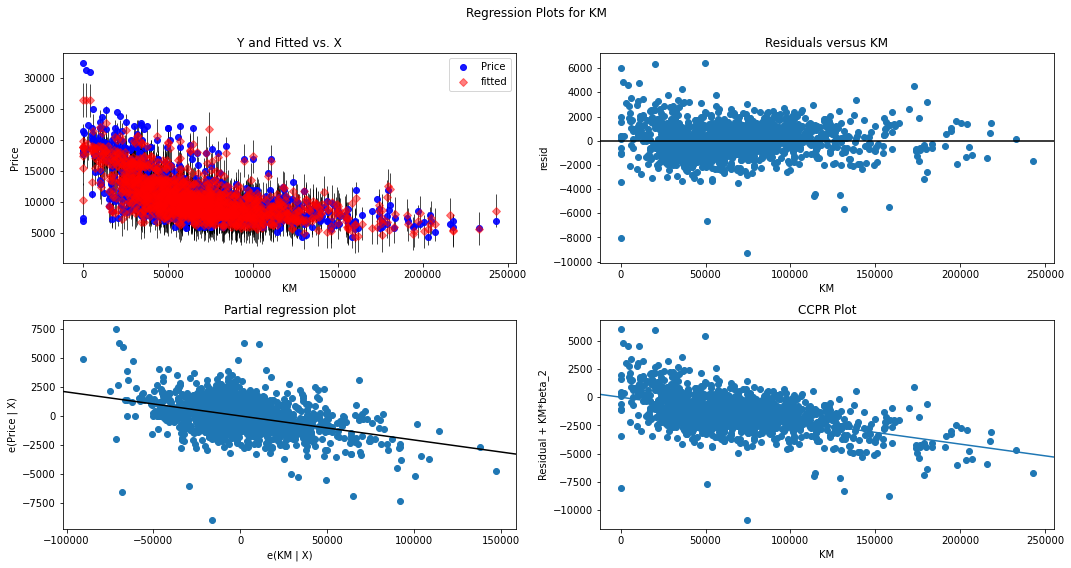

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

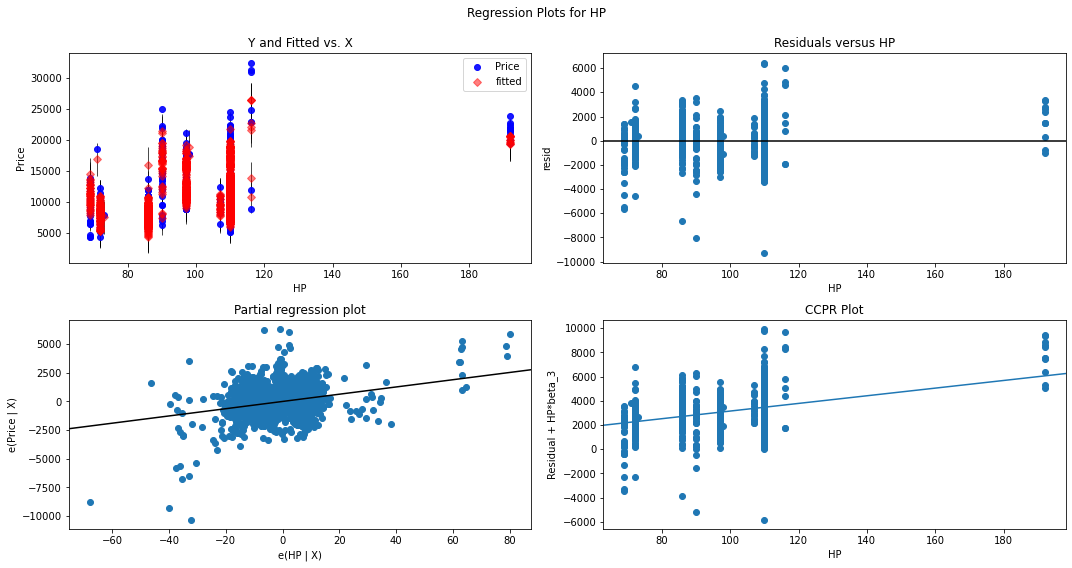

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

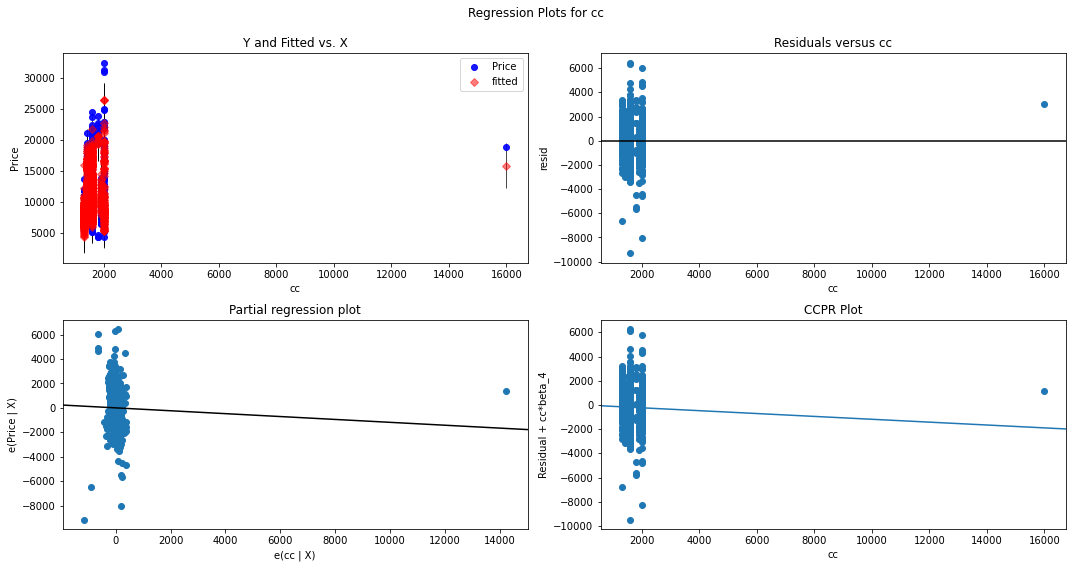

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "cc", fig=fig)
plt.show()

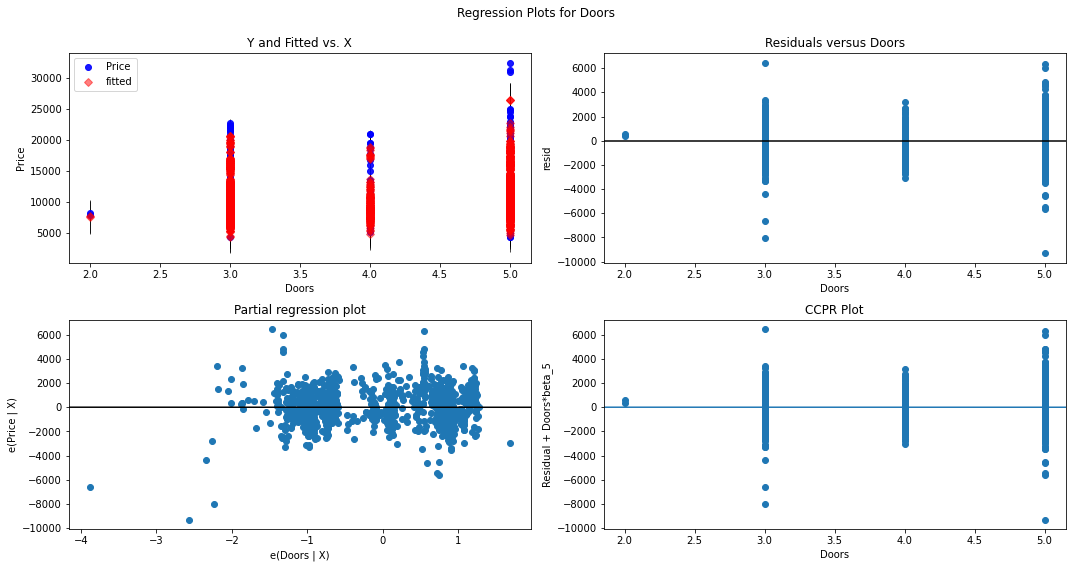

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Doors", fig=fig)
plt.show()

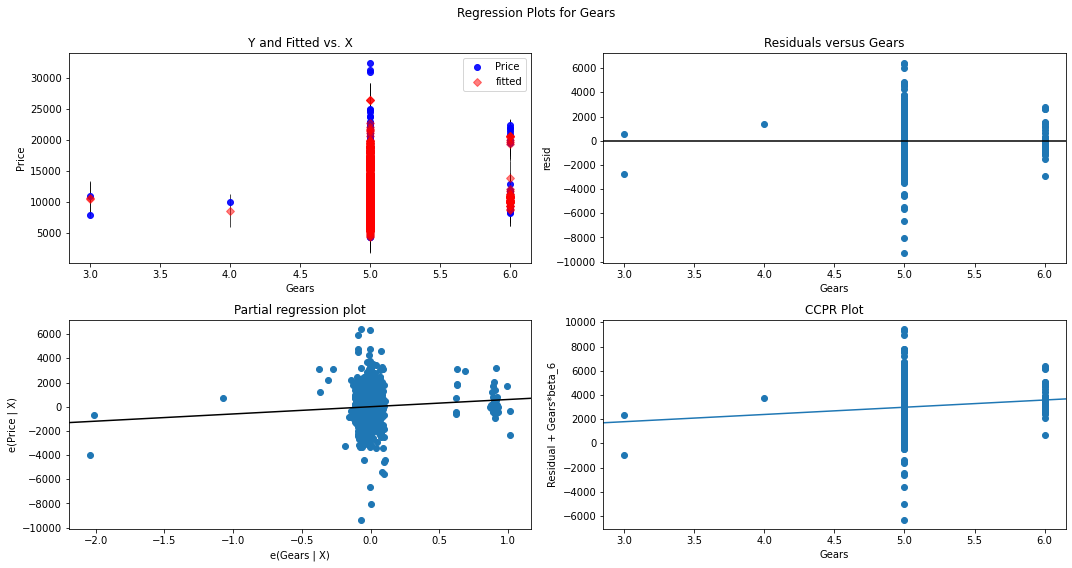

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig)
plt.show()

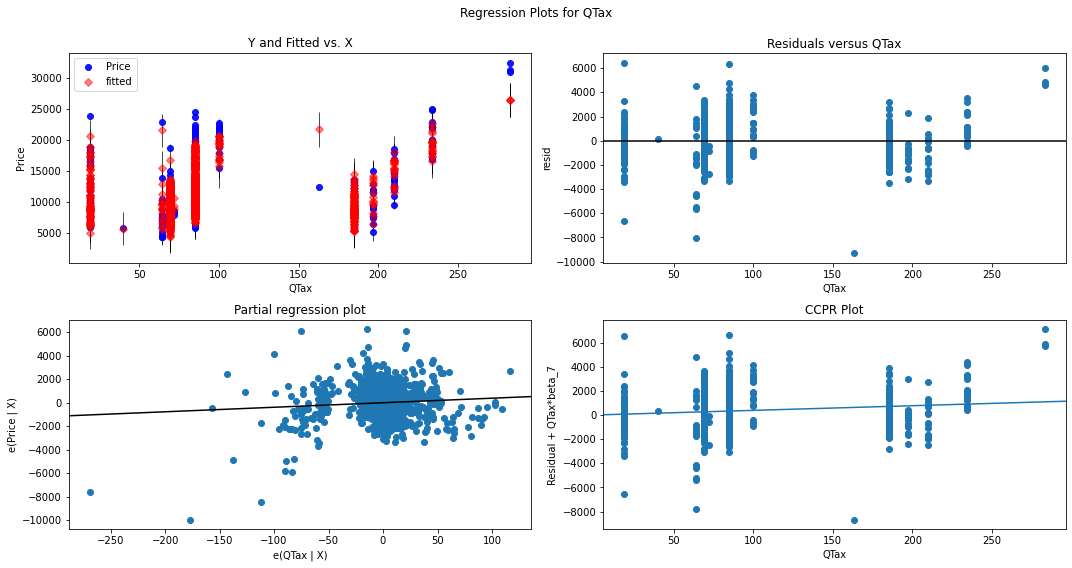

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "QTax", fig=fig)
plt.show()

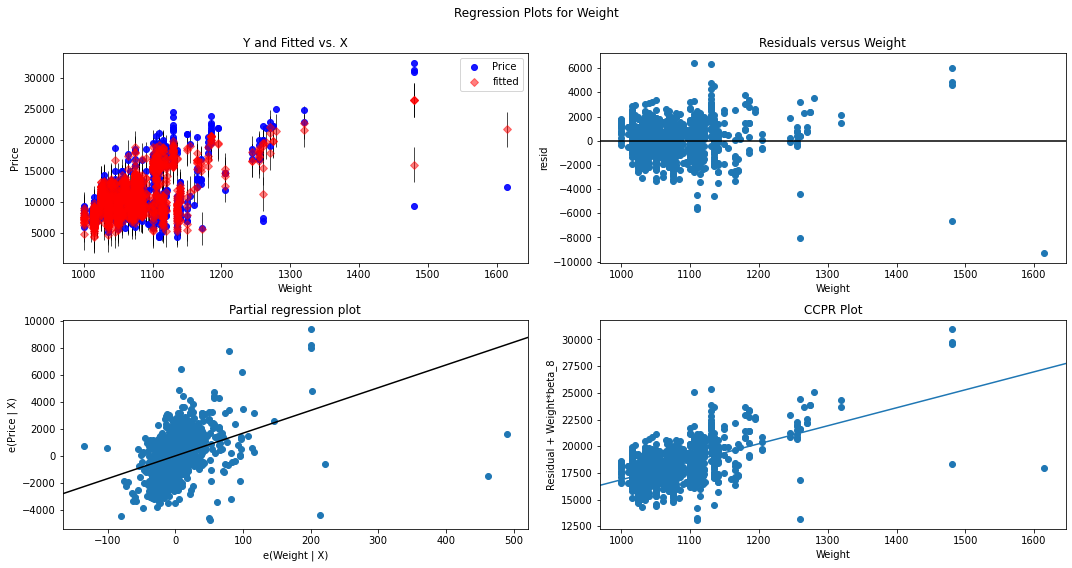

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

In [39]:
# Identifying the outliers to make the model better using cook's distance technique - model2
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

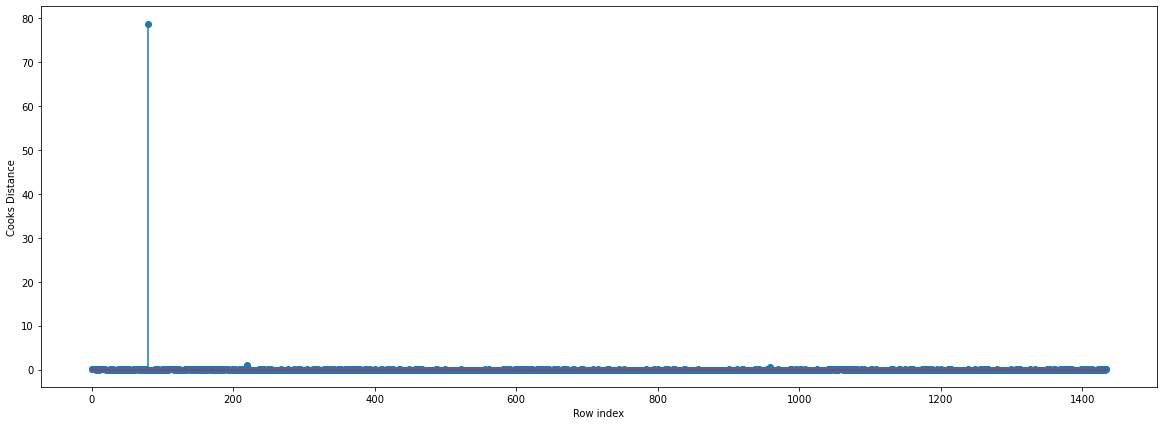

In [40]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(80, 78.7295058224851)

In [42]:
tc2 = tc1.drop([80],axis=0).reset_index()

In [43]:
tc2 = tc2.drop(['index'],axis=1)

In [44]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc2).fit()

In [45]:
(model2.rsquared,model2.rsquared_adj)

(0.8681163912634053, 0.867375992056463)

In [46]:
# model3
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

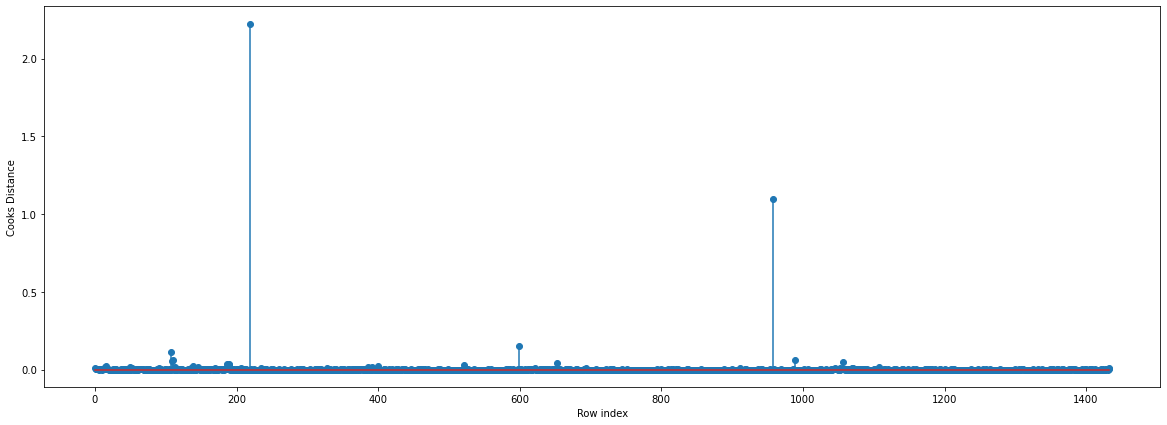

In [47]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
(np.argmax(c),np.max(c))

(219, 2.2253513655271635)

In [49]:
tc3 = tc2.drop([219],axis=0).reset_index()

In [50]:
tc3 = tc3.drop(['index'],axis=1)

In [51]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc3).fit()

In [52]:
(model3.rsquared,model3.rsquared_adj)

(0.8765926307402282, 0.8758993309129262)

In [53]:
# model 4
model_influence = model3.get_influence() 
(c, _) = model_influence.cooks_distance

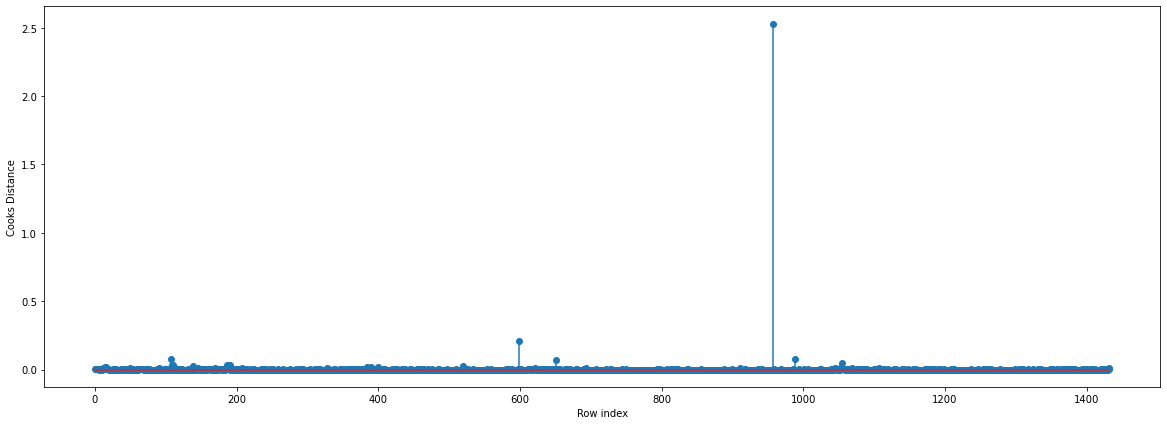

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
(np.argmax(c),np.max(c))

(957, 2.5307796232767026)

In [56]:
tc4 = tc3.drop([957],axis=0).reset_index()

In [57]:
tc4 = tc4.drop(['index'],axis=1)

In [58]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc4).fit()

In [59]:
(model4.rsquared,model4.rsquared_adj)

(0.8839684606741538, 0.8833161400033128)

In [60]:
# model 5
model_influence = model4.get_influence() 
(c, _) = model_influence.cooks_distance

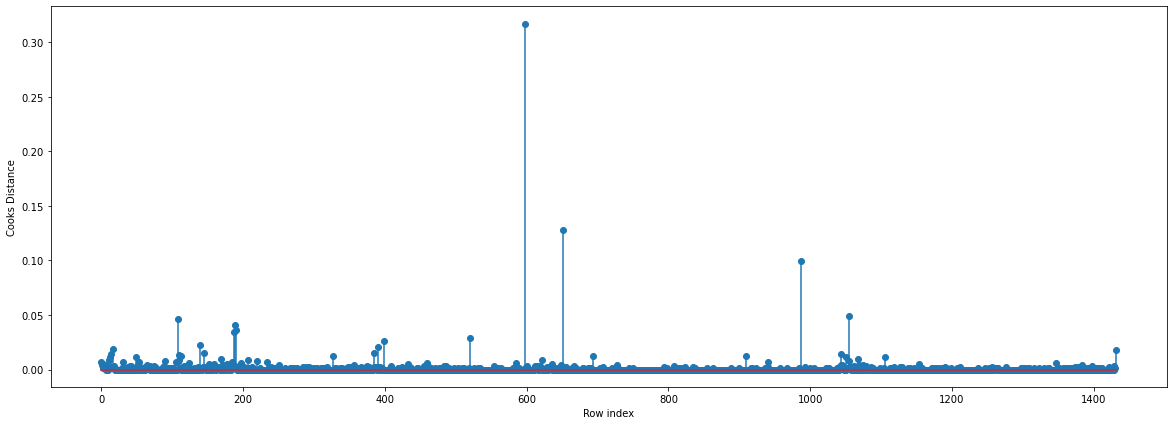

In [61]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
(np.argmax(c),np.max(c))

(598, 0.31689035401453025)

In [63]:
tc5 = tc4.drop([598],axis=0).reset_index()

In [64]:
tc5 = tc5.drop(['index'],axis=1)

In [65]:
model5 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc5).fit()

In [66]:
(model5.rsquared,model5.rsquared_adj)

(0.8882395145171204, 0.8876107635439396)

In [67]:
# model 6
model_influence = model5.get_influence() 
(c, _) = model_influence.cooks_distance

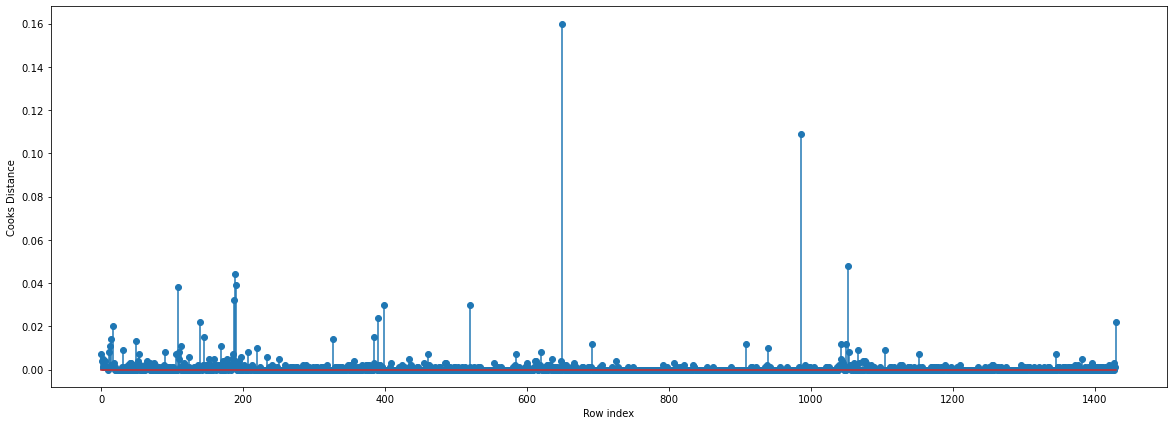

In [68]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [69]:
(np.argmax(c),np.max(c))

(650, 0.16028069686042395)

In [70]:
tc6 = tc5.drop([650],axis=0).reset_index()

In [71]:
tc6 = tc6.drop(['index'],axis=1)

In [72]:
model6 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc6).fit()

In [73]:
(model6.rsquared,model6.rsquared_adj)

(0.8902571486612915, 0.8896393141709962)

In [74]:
# As we are seeing improvement with every data point removal, we will still continue with the same till the time we stop seeing improvement or data does not have any other outlier

In [75]:
# model 7
model_influence = model6.get_influence() 
(c, _) = model_influence.cooks_distance

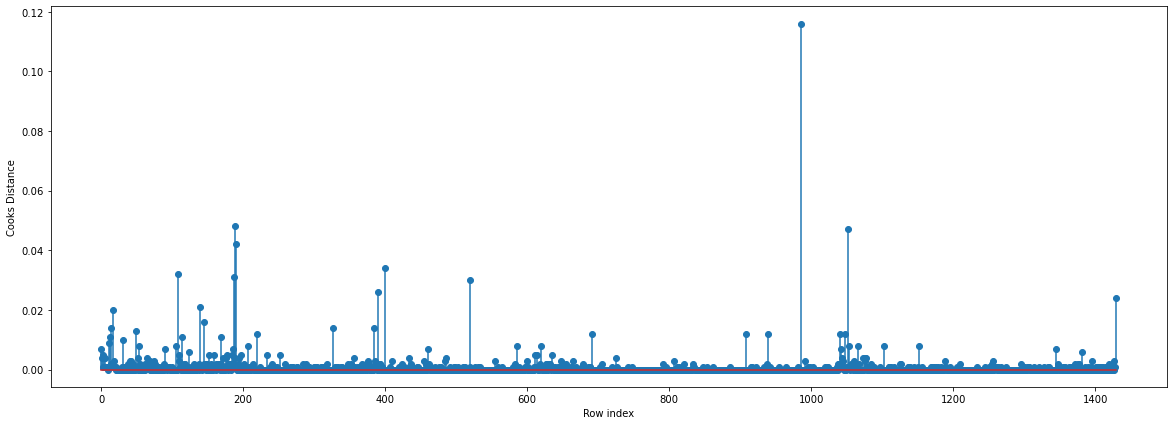

In [76]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc6)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [77]:
(np.argmax(c),np.max(c))

(985, 0.11627991877786145)

In [81]:
tc7 = tc6.drop([985],axis=0).reset_index(drop=True)
tc7

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1424,7500,69,20544,86,1300,3,5,69,1025
1425,10845,72,19000,86,1300,3,5,69,1015
1426,8500,71,17016,86,1300,3,5,69,1015
1427,7250,70,16916,86,1300,3,5,69,1015


In [82]:
model7 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc7).fit()

In [83]:
(model7.rsquared,model7.rsquared_adj)

(0.8909888960319987, 0.8903747489673902)

In [84]:
# model 8
model_influence = model7.get_influence() 
(c, _) = model_influence.cooks_distance

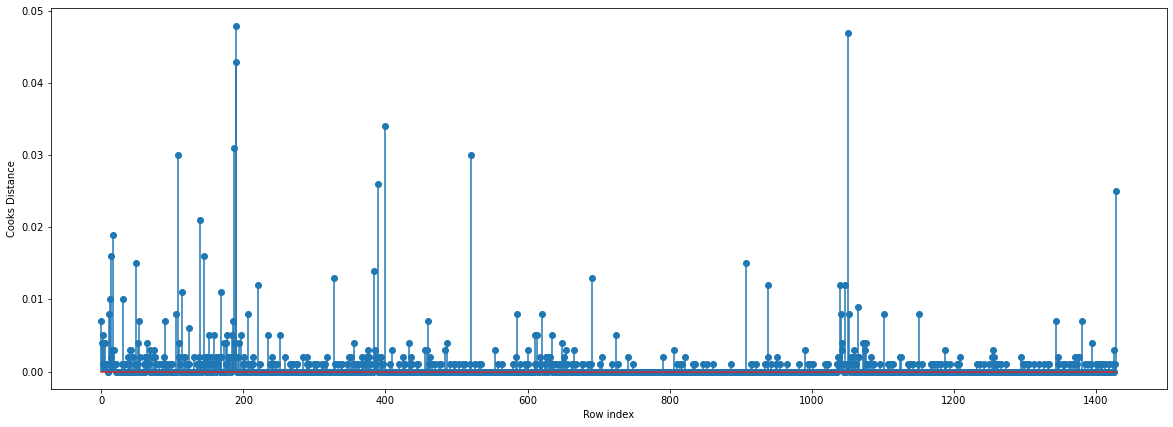

In [85]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc7)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [86]:
# Since all the values fall under 0.05 and many values fall within the same range, we will stop the outlier removal process here
# We can consider Model 7 as the final model and use the regression equation for future estimates.

In [87]:
# Checking the model by predicting the price of the same data set and comparing it with actual values

In [88]:
pred_price = pd.DataFrame (model7.predict(tc7), columns=['Predict_Price'])

In [89]:
pred_price.head()

,Predict_Price
0,16341.105289
1,15885.384177
2,16324.561426
3,15995.766877
4,15894.217599


In [90]:
Actual_Price = tc7['Price']

In [91]:
pred_price1 = pd.concat([Actual_Price, pred_price], axis=1)

In [92]:
pred_price1.head()

,Price,Predict_Price
0,13500,16341.105289
1,13750,15885.384177
2,13950,16324.561426
3,14950,15995.766877
4,13750,15894.217599


In [93]:
Error = pd.DataFrame (((pred_price1['Predict_Price']- pred_price1['Price'])/pred_price1['Price']), columns=['Error'])

In [94]:
result = pd.concat ([pred_price1, Error], axis=1)

In [95]:
result.head()

,Price,Predict_Price,Error
0,13500,16341.105289,0.210452
1,13750,15885.384177,0.155301
2,13950,16324.561426,0.170219
3,14950,15995.766877,0.069951
4,13750,15894.217599,0.155943


In [96]:
result.style.format({'Price': "{:.2f}",'Predict_Price': "{:.2f}",'Error': "{:.2%}"})

,Price,Predict_Price,Error
0,13500.00,16341.11,21.05%
1,13750.00,15885.38,15.53%
2,13950.00,16324.56,17.02%
3,14950.00,15995.77,7.00%
4,13750.00,15894.22,15.59%
5,12950.00,15280.74,18.00%
6,16900.00,17761.35,5.10%
7,18600.00,17762.61,-4.50%
8,21500.00,20953.35,-2.54%
9,12950.00,13499.78,4.25%


In [97]:
result.Error.mean()

0.010996858085417165

In [98]:
# Since the mean of all the error values is close to 0, hence we can say regression equation for forecating is working well.